In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense



In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/pcos_modified.csv")

Mounted at /content/drive/


In [ ]:
df

,Skin darkening (Y/N),Weight gain(Y/N),hair growth(Y/N),Weight (Kg),Cycle(R/I),Pimples(Y/N),Fast food (Y/N),Age (yrs),BMI,Marraige Status (Yrs),PCOS (Y/N)
0,0,0,0,44.6,2,0,1,28,19.3,7.0,0
1,0,0,0,65.0,2,0,0,36,24.9,11.0,0
2,0,0,0,68.8,2,1,1,33,25.3,10.0,1
3,0,0,0,65.0,2,0,0,37,29.7,4.0,0
4,0,0,0,52.0,2,0,0,25,20.1,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
536,0,0,0,50.0,2,0,0,35,18.5,8.0,0
537,0,1,0,63.2,2,0,0,30,25.3,4.0,0
538,0,0,0,54.0,2,0,0,36,23.4,8.0,0
539,0,0,0,50.0,4,1,0,27,22.2,2.0,0


In [ ]:



# Fill missing values with the mean of each column
df = df.fillna(df.mean())

# Split the data into features (X) and target (y)
X = df.drop(columns=['PCOS (Y/N)'])
y = df['PCOS (Y/N)']
y


0      0
1      0
2      1
3      0
4      0
      ..
536    0
537    0
538    0
539    0
540    1
Name: PCOS (Y/N), Length: 541, dtype: int64

In [ ]:
X

,Skin darkening (Y/N),Weight gain(Y/N),hair growth(Y/N),Weight (Kg),Cycle(R/I),Pimples(Y/N),Fast food (Y/N),Age (yrs),BMI,Marraige Status (Yrs)
0,0,0,0,44.6,2,0,1,28,19.3,7.0
1,0,0,0,65.0,2,0,0,36,24.9,11.0
2,0,0,0,68.8,2,1,1,33,25.3,10.0
3,0,0,0,65.0,2,0,0,37,29.7,4.0
4,0,0,0,52.0,2,0,0,25,20.1,1.0
...,...,...,...,...,...,...,...,...,...,...
536,0,0,0,50.0,2,0,0,35,18.5,8.0
537,0,1,0,63.2,2,0,0,30,25.3,4.0
538,0,0,0,54.0,2,0,0,36,23.4,8.0
539,0,0,0,50.0,4,1,0,27,22.2,2.0


In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Build the MLP model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/10
13/13 [==============================] - 1s 22ms/step - loss: 1.2304 - accuracy: 0.5753 - val_loss: 0.8368 - val_accuracy: 0.3015
Epoch 2/10
13/13 [==============================] - 0s 7ms/step - loss: 0.7711 - accuracy: 0.5259 - val_loss: 0.6812 - val_accuracy: 0.6912
Epoch 3/10
13/13 [==============================] - 0s 6ms/step - loss: 0.6071 - accuracy: 0.6741 - val_loss: 0.6378 - val_accuracy: 0.7132
Epoch 4/10
13/13 [==============================] - 0s 5ms/step - loss: 0.5591 - accuracy: 0.7210 - val_loss: 0.6071 - val_accuracy: 0.7721
Epoch 5/10
13/13 [==============================] - 0s 5ms/step - loss: 0.5478 - accuracy: 0.7481 - val_loss: 0.6046 - val_accuracy: 0.7647
Epoch 6/10
13/13 [==============================] - 0s 5ms/step - loss: 0.5376 - accuracy: 0.7383 - val_loss: 0.5782 - val_accuracy: 0.7868
Epoch 7/10
13/13 [==============================] - 0s 6ms/step - loss: 0.5216 - accuracy: 0.7802 - val_loss: 0.5702 - val_accuracy: 0.7794
Epoch 8/10
13/13 [=

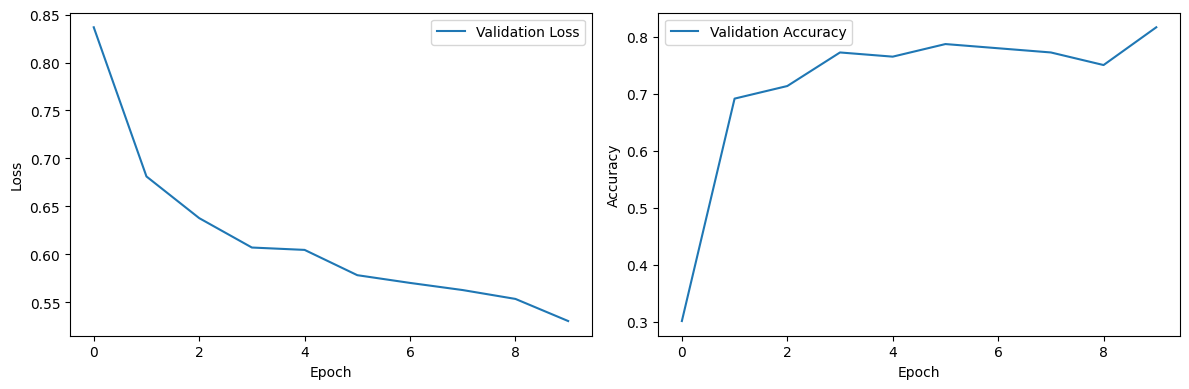

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Plot validation loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred).flatten()

print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Calculate F1 score, precision, and recall
f1 = f1_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)

print(f'F1 Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

5/5 [==============================] - 0s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        94
           1       1.00      0.40      0.58        42

    accuracy                           0.82       136
   macro avg       0.89      0.70      0.73       136
weighted avg       0.85      0.82      0.79       136

F1 Score: 0.5763
Precision: 1.0000
Recall: 0.4048


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

5/5 [==============================] - 0s 3ms/step - loss: 0.5304 - accuracy: 0.8162
Test loss: 0.5304
Test accuracy: 0.8162
